# Sprint 9 T01

In [1]:
import pandas as pd
pd.options.display.max_colwidth = 400
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import re
import string
from matplotlib import pyplot as plt
from collections import Counter
sentimentAnalyser = SentimentIntensityAnalyzer()

**Voy a trabajar sobre el discurso "I Have a Dream" de Martin Luter King Jr**

- Cargo el discurso

In [2]:
Luter = open("c:/Juan/ITAcademy/Sprint_9/I Have A Dream Martin Luter.txt").read()
Luter = Luter.replace('\n', ' ')

- Elimino espacios innecesarios, signos de puntuación y caracteres especiales y convierto a minúsculas. 

In [3]:
texto = Luter.translate(str.maketrans('', '', string.punctuation))
texto = texto.lower()
texto = re.sub(r'\d+', '', texto)
texto = texto.strip()

In [32]:
len(Luter)

9034

In [33]:
len(texto)

8836

- El discurso de Luter King tiene 8836 palabras. 

### Ejercicio 1

- Separo palabras, obtengo su frecuencia y grafico las más frecuentes. 

In [46]:
Luter_palabras = texto.split()
Luter_frecuencia = Counter(Luter_palabras)

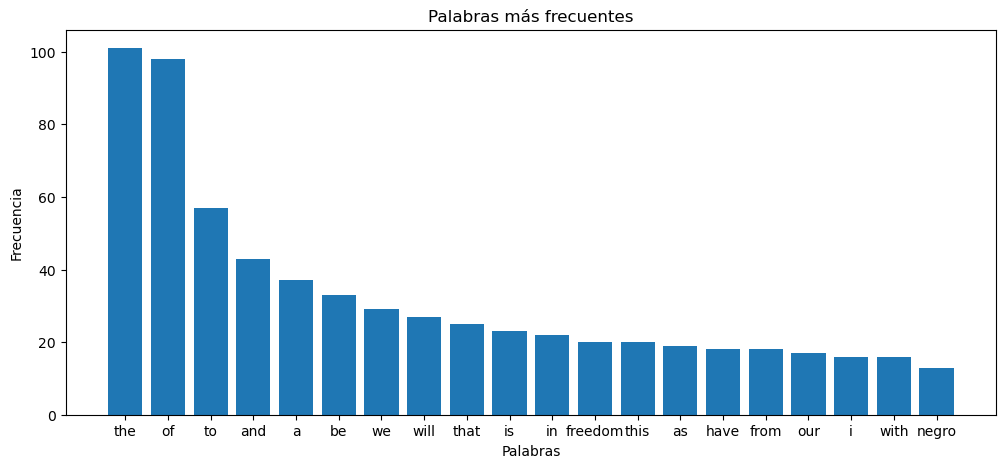

In [35]:
palabras_frec = Luter_frecuencia.most_common(20)
Luter_palabras, Luter_frecuencia = zip(*palabras_frec)
plt.figure(figsize=(12,5))
plt.bar(Luter_palabras, Luter_frecuencia)
plt.title('Palabras más frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

In [47]:
len(Luter_palabras)

1644

- Esta frecuencia de las primeras 20 palabras con *stopwords* incluidas dice poco del discurso. Aún así, con palabras como "freedom", "negro" o "our"  dentro de las más frecuentes, ya se puede adivinar un discruso relacionado con derechos civiles, específicamente por el color de piel. 

### Ejercicio 2

- Quito las stopwords

In [48]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
palabras_limp = [palabra for palabra in Luter_palabras if palabra not in stop_words]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MM\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


- Ahora lemantizo 

In [49]:
lemmatizer = WordNetLemmatizer()
palabras_leman = [lemmatizer.lemmatize(t) for t in palabras_limp]

In [50]:
len(palabras_leman)

828

In [51]:
len(palabras_limp)

828

In [52]:
Lex =  len(palabras_limp)/len(texto)
Lex

0.09370755998189226

- La riqueza léxica del discurso es ámplia, el 9.4% del total de palabras son diferentes. 

In [53]:
palab = palabras_leman
frec = Counter(palab)

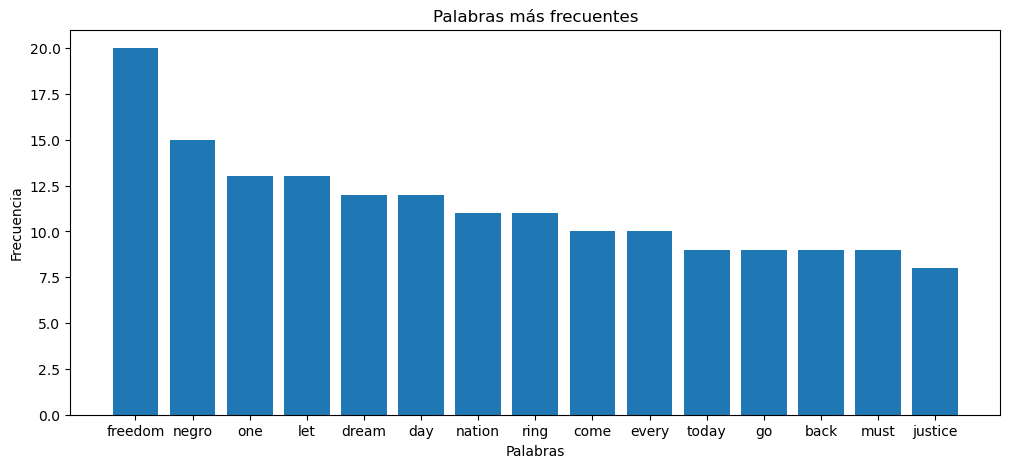

In [54]:
palabras_frec = frec.most_common(15)
palab, frec = zip(*palabras_frec)
plt.figure(figsize=(12,5))
plt.bar(palab, frec)
plt.title('Palabras más frecuentes')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.show()

- Al quitar las *stopwords* y ver nuevamente la frecuencia de las 20 palabras más usadas, además de derechos civiles de los negros, se ven más detalles, el discurso habla de justicia, libertades, sobre nación, sueños o fraternidad (one, every).  

### Ejercicio 3

Análisis de sentimiento

- Tokenizo para convertir el texto en oraciones y enumero las oraciones

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MM\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
LuterJr = nltk.sent_tokenize(Luter)
for number, sentence in enumerate(LuterJr):
    print(number, sentence)

0 "I Have A Dream" Martin Luther King, Jr. August 28, 1963  I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.
1 Five score years ago, a great American, in whose symbolic shadow we stand today, signed the Emancipation Proclamation.
2 This momentous decree came as a great beacon light of hope for millions of Negro slaves who had been seared in the flames of withering injustice.
3 But one hundred years later, the Negro still is not free.
4 One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination.
5 One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity.
6 One hundred years later, the Negro is still languished in the corners of American society and finds himself an exile in his own land.
7 So we've come here today to dramatize a shameful condition.
8 In a sens

- Hago el análisis del sentimiento. 

In [57]:
sentences = LuterJr
sentence_scores = []
for number, sentence in enumerate(sentences):
    scores = sentimentAnalyser.polarity_scores(sentence)
    sentence_scores.append({'Frase': sentence, 'Número frase': number+1, 'Puntaje_sentimiento': scores['compound']})

In [58]:
Luter_df = pd.DataFrame(sentence_scores)

- 10 frases más negativas

In [59]:
Luter_df.sort_values(by='Puntaje_sentimiento')[:15]

,Frase,Número frase,Puntaje_sentimiento
39,We can never be satisfied as long as the Negro is the victim of the unspeakable horrors of police brutality.,40,-0.9028
32,We must not allow our creative protest to degenerate into physical violence.,33,-0.8470
40,"We can never be satisfied as long as our bodies, heavy with the fatigue of travel, cannot gain lodging in the motels of the highways and the hotels of the cities.",41,-0.7276
5,"One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity.",6,-0.7003
30,Let us not seek to satisfy our thirst for freedom by drinking from the cup of bitterness and hatred.,31,-0.6346
3,"But one hundred years later, the Negro still is not free.",4,-0.5504
22,It would be fatal for the nation to overlook the urgency of the moment.,23,-0.5423
7,So we've come here today to dramatize a shameful condition.,8,-0.4939
20,Now is the time to lift our nation from the quicksands of racial injustice to the solid rock of brotherhood.,21,-0.4767
13,But we refuse to believe that the bank of justice is bankrupt.,14,-0.4767


- 10 frases más positivas

In [60]:
Luter_df.sort_values(by='Puntaje_sentimiento', ascending=False)[:15]

,Frase,Número frase,Puntaje_sentimiento
77,"And when this happens, and when we allow freedom [sic] ring, when we let it ring from every village and every hamlet, from every state and every city, we will be able to speed up that day when all of God's children-black men and white men, Jews and Gentiles, Protestants and Catholics-will be able to join hands and sing in the words of the old Negro spiritual, ""Free at last, free at last; thank...",78,0.9674
0,"""I Have A Dream"" Martin Luther King, Jr. August 28, 1963 I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.",1,0.9493
67,"This will be the day, this will be the day when all of God's children will be able to sing with new meaning-""my country 'tis of thee, sweet land of liberty, of thee I sing; land where my fathers died, land of the pilgrim's pride; from every mountain side, let freedom ring""-and if America is to be a great nation, this must become true.",68,0.9460
10,"This note was a promise that all men, yes, black men as well as white men, would be guaranteed the unalienable rights of life, liberty, and the pursuit of happiness.",11,0.9201
15,"So we've come to cash this check, a check that will give us upon demand the riches of freedom and the security of justice.",16,0.9169
34,"The marvelous new militancy which has engulfed the Negro community must not lead us to a distrust of all white people, for many of our white brothers, as evidenced by their presence here today, have come to realize that their destiny is tied up with our destiny and they have come to realize that their freedom is inextricably bound to our freedom.",35,0.8885
66,"With this faith we will be able to work together, to pray together, to struggle together, to go to jail together, to stand up for freedom together, knowing that we will be free one day.",67,0.8834
76,"Let freedom ring from every hill and molehill of Mississippi, from every mountain side, let freedom ring.",77,0.8555
54,"I have a dream that one day this nation will rise up and live out the true meaning of its creed-we hold these truths to be self evident, that all men are created equal.",55,0.8225
23,This sweltering summer of the Negro's legitimate discontent will not pass until there is an invigorating autumn of freedom and equality.,24,0.8074


- Obervando el puntaje de sentimiento, las frases positivas superan a las negativas, ya se puede afirmar que es un discurso en positivo. 
- También llama la atención que las frases más positivas del discurso son la primera y la última. Una apertura y un cierre con fuerza. 

- Hago un gráfico del puntaje de setimiento por frase

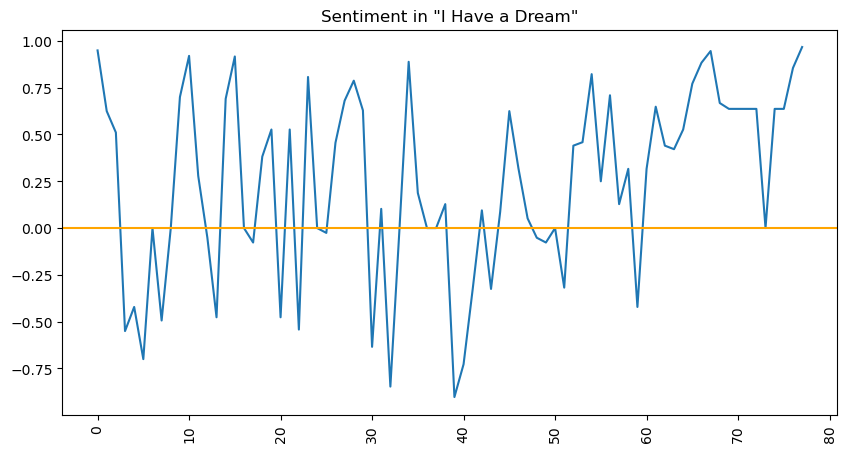

In [61]:
ax = Luter_df['Puntaje_sentimiento'].plot(x='Número frase', y='Puntaje_sentimiento', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "I Have a Dream"')

plt.axhline(y=0, color='orange', linestyle='-');

- Con cinco frases de rango para ver mejor la tendencia. 

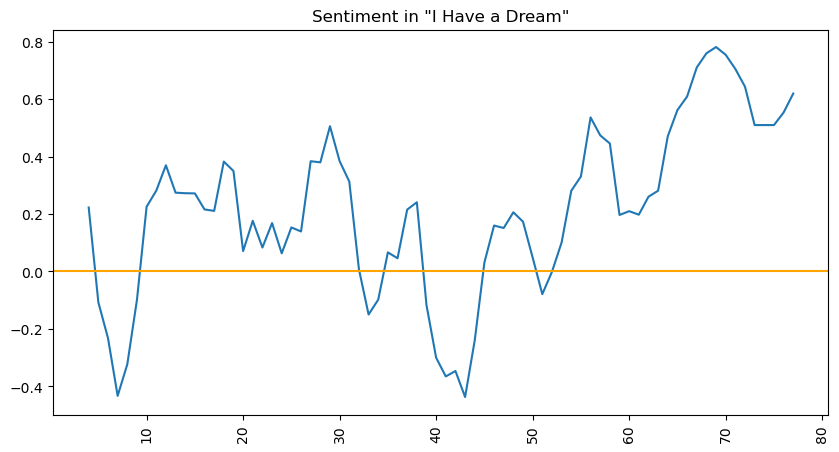

In [62]:
Luter_df.rolling(5)['Puntaje_sentimiento'].mean().plot(x='Número frase', y='Puntaje_sentimiento', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "I Have a Dream"')

plt.axhline(y=0, color='orange', linestyle='-');

- En estos gráficos del setimiento se confirma que es un discurso positivo (como en el puntaje de las frases) pero además se observa como inicia en positivo y enseguida cae a la parte más negativa, una forma de atrapar a la audiencia. Después pasa a positvo y se mantiene con altibajos, podría interpretarse como una especie de toma de consciencia. Finalmente hace un bajón a negativo y no parar de subir, llegando al máximo de positivo, esto sería la exaltación. Un discurso bien construido.  

- El discurso de Martin Luther King tenía como objetivo denunciar los atropellos y abusos sufridos por los afroamericanos y exigir la justicia y la libertad a que tenían derecho como ciudadanos norteamericanos. Está considerado un discurso profundamente optimista y esperanzador y propone una sociedad fundamentada en la igualdad y la fraternidad. 
    - El resultado del análisis del lenguaje, al menos para este discurso, me parece bastante acertado. Deja claro que es un discurso positivo que habla de derechos y libertades para los negros y de sociedad mas igualitarias y fraternales.
    - Por otro lado, el discurso es considerado "profundamente optimista". A través del análisis, también resulta un discurso optimista, pero no se aprecia tanta profundidad. 